In [1]:
from pyforest import *


1. Data Understanding and analysis- Consider the user and the properties of those users as given in the sample data. The data is a snapshot of the users using a mobile application and their behavior. 

The tasks would be to:

Expand and randomize the data for about 30,000 users

Take into consideration all the possible factors some of which including
a) A user registered at a date and uninstalled at the same data
b) A user didn't uninstall but also didn't spend any time on the app
c) A user uninstalled but reinstalled ( a possible approach to take this into account), and also any other possibility you can think of regarding this data.

Perform all the necessary actions to make this data ready for ML modeling.

2. Data Science and Machine Learning: For the next part, run any data science model on the above data to predict which users will stay on the application or uninstall it.



3. Final part: WordPress plugin for this model, so that it can be deployed on any WordPress website. You don’t have to create a plugin, just a process to deploy this model on WordPress from scratch to deployment in a production environment. A flowchart or something similar would be preferable. Along with the technologies used.

To evaluate this, please create a small plugin of your choice that can be integrated with WordPress.

.




In [2]:
#Web push notifications are messages that come from a website. You get them on your desktop or device even 
#when the concerned web page is not open in your browser.
#They are a brand new/ nascent marketing channel to re engage your visitors without knowing their email or other contact details.



In [3]:
#drop column Acquired_Medium_google_/_others

data is of only 1036 rows 
in this case if we build a model it wll be bias 


In [4]:
#data.to_csv('cleanedmobileapp.csv',index=False)

In [5]:
data=pd.read_excel("C:/Users/Eagle3y3/Desktop/project/Sample Data1.xlsx")

In [6]:
import pandas_profiling as pp


In [7]:
pp.ProfileReport(data)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 14 columns):
User_ID                            1036 non-null int64
Session_Count                      909 non-null float64
Uninstall_Date                     846 non-null datetime64[ns]
usertime                           1035 non-null float64
Share_Count                        433 non-null float64
Notification_Receive               710 non-null float64
Notification_Dismiss               643 non-null float64
Notification_Open                  377 non-null float64
Acquired_Medium_google_/_others    1036 non-null object
Reg_at_date                        532 non-null datetime64[ns]
CIty_                              230 non-null object
Video_Count                        1036 non-null int64
Quiz_Count                         1036 non-null int64
recency                            1036 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(2)
memory usage: 113.4+ KB


In [9]:
data.shape

(1036, 14)

In [10]:
data.describe()

User_ID  Session_Count      usertime  Share_Count  \
count  1036.000000     909.000000   1035.000000   433.000000   
mean   2620.734556      28.093509   5900.944334     7.076212   
std     385.317220      46.495950   8885.525183     8.784520   
min     567.000000       1.000000      1.317000     1.000000   
25%    2320.750000       3.000000    583.552500     2.000000   
50%    2636.500000      11.000000   2301.988000     4.000000   
75%    2928.250000      34.000000   7783.569000     9.000000   
max    3262.000000     401.000000  70608.383000   113.000000   

       Notification_Receive  Notification_Dismiss  Notification_Open  \
count            710.000000            643.000000         377.000000   
mean              66.667606             52.101089           7.336870   
std              114.382389             83.900869          13.818564   
min                1.000000              1.000000           1.000000   
25%                5.000000              5.000000           1.000000   
50%               21.000000             19.000000           2.000000   
75%               79.000000             64.500000           7.000000   
max              749.000000            602.000000         148.000000   

       Video_Count   Quiz_Count       recency  
count  1036.000000  1036.000000   1036.000000  
mean     12.574324    23.095560 -13195.472008  
std      16.497204    31.058205  26608.726566  
min       0.000000     0.000000 -43801.000000  
25%       0.000000     0.000000 -43404.000000  
50%       6.000000     5.000000   -107.000000  
75%      20.000000    41.000000     -2.000000  
max     114.000000   158.000000  43605.000000

# dropping column('Acquired_Medium_google_/_others',
  

In [11]:
data.drop('Acquired_Medium_google_/_others',
  axis='columns', inplace=True)

In [12]:
df1=data.select_dtypes(include=['object'])


In [13]:
df1.head()

CIty_
0     NaN
1     NaN
2  Mumbai
3  Mumbai
4     NaN

In [14]:
data.isnull().sum()

User_ID                   0
Session_Count           127
Uninstall_Date          190
usertime                  1
Share_Count             603
Notification_Receive    326
Notification_Dismiss    393
Notification_Open       659
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

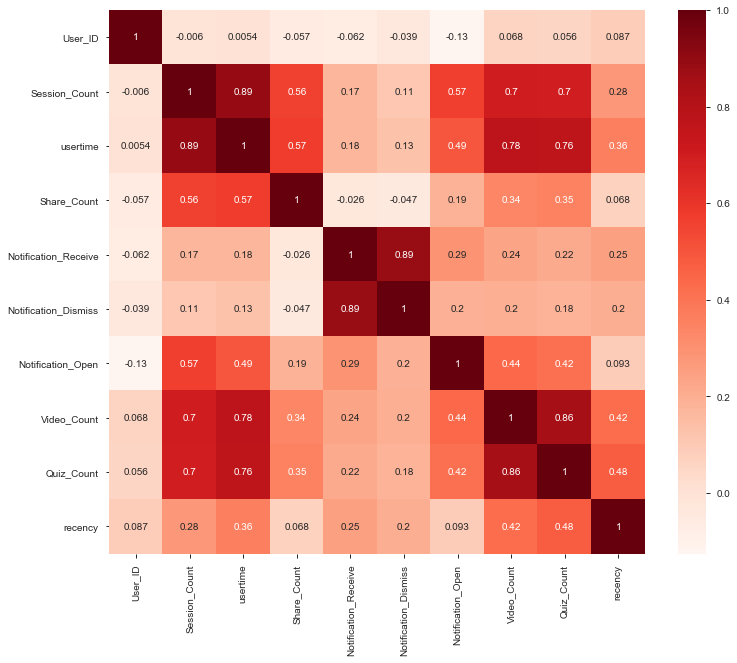

In [15]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
import seaborn as sns

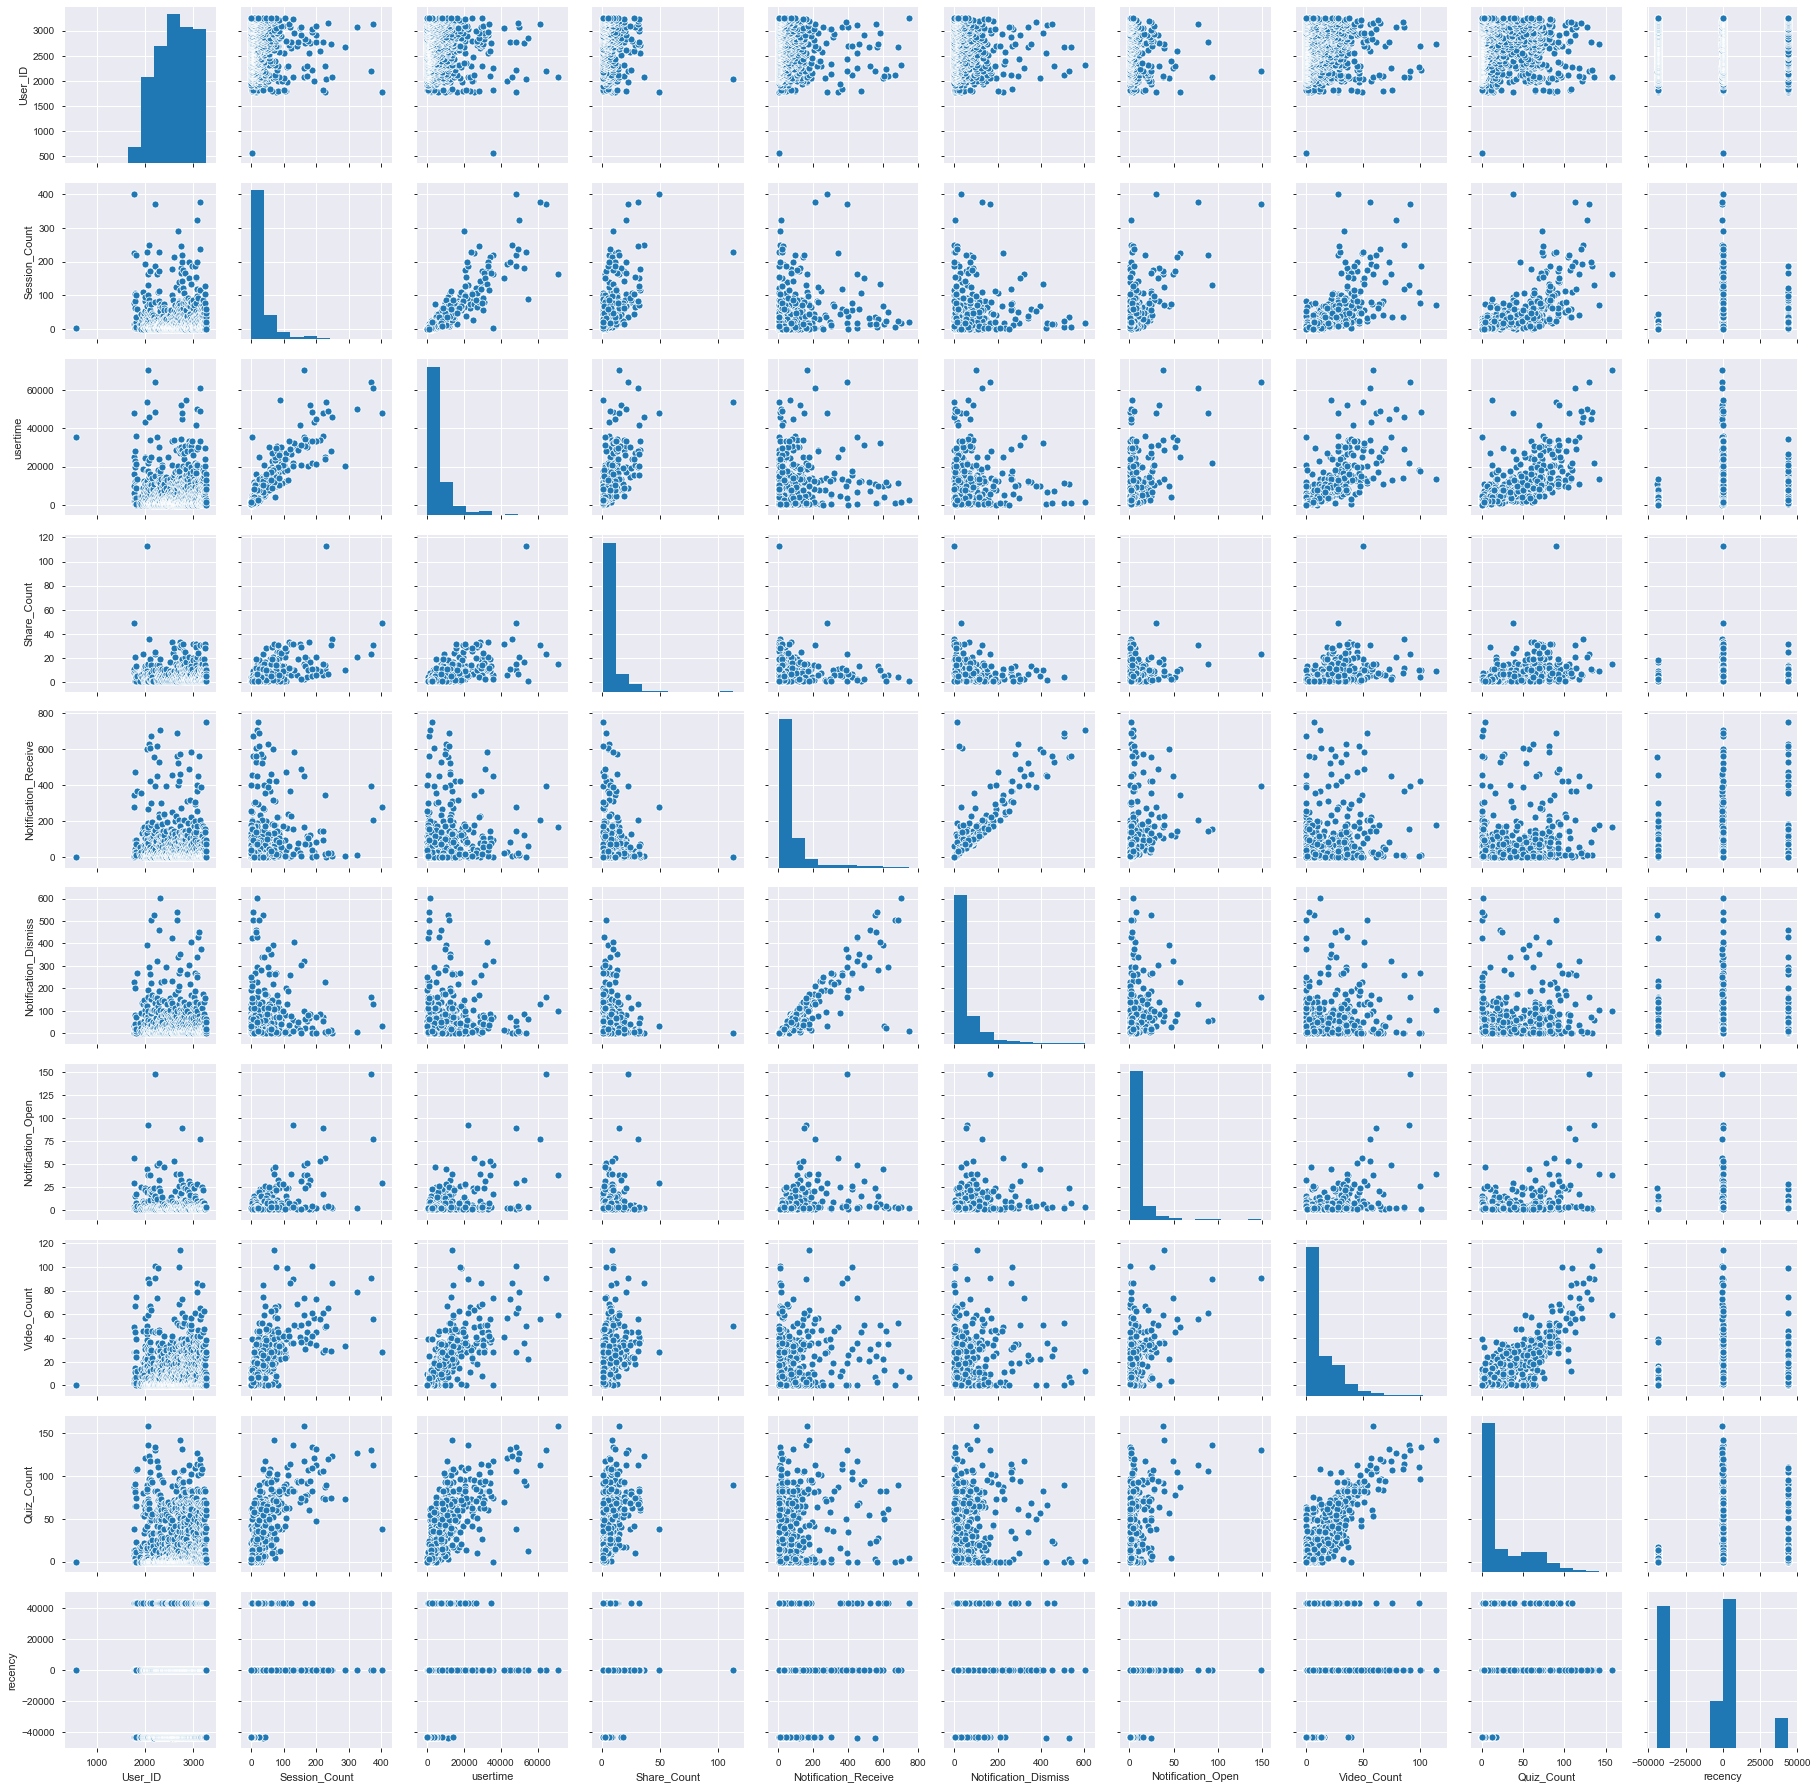

In [17]:
sns.pairplot(data)

# Session count is a record of the number of times a user visits your website within a given timeframe, such as day, week, or month


In [18]:
data.Session_Count.value_counts()

1.0      120
2.0       65
3.0       56
4.0       47
5.0       45
6.0       33
8.0       28
7.0       23
12.0      23
9.0       22
19.0      18
14.0      18
10.0      14
15.0      14
13.0      13
11.0      13
21.0      12
17.0      12
44.0      10
18.0       9
23.0       9
16.0       9
25.0       9
37.0       9
31.0       9
22.0       8
29.0       7
41.0       7
32.0       7
24.0       7
        ... 
186.0      1
129.0      1
105.0      1
54.0       1
199.0      1
124.0      1
140.0      1
200.0      1
108.0      1
88.0       1
152.0      1
132.0      1
78.0       1
120.0      1
236.0      1
128.0      1
164.0      1
102.0      1
401.0      1
229.0      1
369.0      1
163.0      1
173.0      1
167.0      1
165.0      1
151.0      1
50.0       1
289.0      1
226.0      1
375.0      1
Name: Session_Count, Length: 136, dtype: int64

# considering a person usage in a month 
# as the max usage is 375 
1 one timevisit 
2-20 moderate visit 
20-50 medium visit
50 abv frequent visit

implying mean to the missing value

In [19]:
data.Session_Count.mean()

28.093509350935093

In [20]:
data.Session_Count.fillna(28,inplace=True)

In [21]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count             603
Notification_Receive    326
Notification_Dismiss    393
Notification_Open       659
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# datanew["conditionew"]=datanew["condition"].astype("int")

# Share Counts is the official tally of how many times a link has been shared on a social network, according to the social network.


In [22]:
data.Share_Count.value_counts()

1.0      88
2.0      47
4.0      42
3.0      42
5.0      33
6.0      26
8.0      21
10.0     19
11.0     17
7.0      17
9.0      11
13.0      9
15.0      7
12.0      6
14.0      6
19.0      5
21.0      5
32.0      4
18.0      3
17.0      3
31.0      3
25.0      2
33.0      2
24.0      2
28.0      2
23.0      2
16.0      2
29.0      2
113.0     1
36.0      1
26.0      1
20.0      1
49.0      1
Name: Share_Count, dtype: int64

# one time 
# 2-20 average
# 20 abv max  

In [23]:
data.Share_Count.mean()

7.076212471131639

In [24]:
data.Share_Count.fillna(7.0,inplace=True)

In [25]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count               0
Notification_Receive    326
Notification_Dismiss    393
Notification_Open       659
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

In [26]:
data.head()

User_ID  Session_Count Uninstall_Date   usertime  Share_Count  \
0      567            4.0     2019-01-07  35522.331          7.0   
1     1777           16.0     2018-10-05  16251.738          7.0   
2     1778          401.0     2019-03-08  48032.113         49.0   
3     1780          226.0     2019-08-28  25157.275         11.0   
4     1781           14.0     2018-09-14   6104.008          7.0   

   Notification_Receive  Notification_Dismiss  Notification_Open Reg_at_date  \
0                   1.0                   NaN                NaN  2019-01-07   
1                   7.0                   3.0                4.0  2018-11-23   
2                 279.0                  32.0               30.0  2018-11-22   
3                 342.0                 227.0               57.0  2018-11-25   
4                   2.0                   2.0                NaN         NaT   

    CIty_  Video_Count  Quiz_Count  recency  
0     NaN            0           0        0  
1     NaN            5          13       49  
2  Mumbai           28          38     -106  
3  Mumbai           49          87     -276  
4     NaN            4           8   -43357

# Notification_Receive

In [27]:
data.Notification_Receive.value_counts()

1.0      75
2.0      54
3.0      26
5.0      21
6.0      20
4.0      16
9.0      14
16.0     14
8.0      14
7.0      13
11.0     11
15.0     11
23.0     11
26.0      9
21.0      9
20.0      8
14.0      8
17.0      8
13.0      8
10.0      7
86.0      7
12.0      7
18.0      6
19.0      6
31.0      5
22.0      5
73.0      5
42.0      5
29.0      5
30.0      5
         ..
400.0     1
140.0     1
571.0     1
224.0     1
68.0      1
204.0     1
272.0     1
102.0     1
165.0     1
453.0     1
163.0     1
177.0     1
461.0     1
599.0     1
671.0     1
311.0     1
401.0     1
703.0     1
355.0     1
687.0     1
749.0     1
207.0     1
153.0     1
171.0     1
145.0     1
229.0     1
201.0     1
422.0     1
558.0     1
304.0     1
Name: Notification_Receive, Length: 200, dtype: int64

In [28]:
data.Notification_Receive.mean()

66.66760563380282

In [29]:
data.Notification_Receive.fillna(66.66,inplace=True)

In [30]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count               0
Notification_Receive      0
Notification_Dismiss    393
Notification_Open       659
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# Notification_Dismiss

In [31]:
data.Notification_Dismiss.mean()

52.10108864696734

In [32]:
data.Notification_Dismiss.fillna(52.10,inplace=True)

In [33]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open       659
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# Notification_Open

In [34]:
data.Notification_Open.mean()

7.336870026525199

In [35]:
data.Notification_Open.fillna(7.33,inplace=True)

In [36]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                   806
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

In [37]:
#Native video views are counted after the content is played for 3 seconds. That means a quick thumb-scroll past a video isn't going to count,
#but if you pause and give the content even brief attention, that will count.

# Video_Count

In [38]:
data.Video_Count.value_counts()

0      291
1       81
2       45
3       37
5       29
7       26
11      25
4       24
6       24
14      22
15      22
13      21
12      20
24      19
9       19
8       17
10      17
17      17
23      15
20      15
22      14
31      13
19      12
29      12
28      12
18      11
25      11
26      11
36      11
21       9
      ... 
56       2
41       2
67       2
47       2
48       2
50       2
57       2
86       2
59       2
61       2
90       1
79       1
85       1
101      1
91       1
74       1
99       1
100      1
75       1
64       1
73       1
69       1
66       1
65       1
40       1
63       1
58       1
49       1
43       1
114      1
Name: Video_Count, Length: 75, dtype: int64

# Quiz_Count

In [39]:
data.Quiz_Count.value_counts()

0      356
1       45
5       35
3       30
4       28
2       27
11      21
13      17
6       16
10      16
70      12
17      11
18      11
26      10
71      10
16       9
22       9
60       9
8        9
69       9
20       9
72       8
33       8
38       8
41       8
14       8
61       8
63       8
65       7
68       7
      ... 
44       2
48       2
92       2
52       2
90       2
97       1
114      1
120      1
121      1
130      1
123      1
127      1
80       1
132      1
134      1
136      1
79       1
87       1
110      1
109      1
32       1
88       1
106      1
104      1
102      1
142      1
43       1
77       1
96       1
158      1
Name: Quiz_Count, Length: 117, dtype: int64

# city

In [40]:
data.CIty_.value_counts()

Mumbai    224
Pune        3
Delhi       2
Other       1
Name: CIty_, dtype: int64

In [41]:
data.CIty_.fillna('Mumbai',inplace=True)

In [42]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  1
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                     0
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# user time 

In [43]:
data.usertime                  .mean()

5900.944334299517

In [44]:
data.usertime.fillna(5900.944,inplace=True)

In [45]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  0
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                     0
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# uninstall date 

In [46]:
data[pd.isnull(data.Uninstall_Date)]

User_ID  Session_Count Uninstall_Date   usertime  Share_Count  \
6        1783           16.0            NaT   1995.352          7.0   
9        1791          106.0            NaT  12309.465          1.0   
13       1802            4.0            NaT   1851.413          7.0   
18       1814           21.0            NaT   3751.640          4.0   
21       1818            7.0            NaT    268.247          1.0   
22       1819           37.0            NaT  13051.634          4.0   
23       1834           59.0            NaT  13274.989          5.0   
25       1907            3.0            NaT    146.161          7.0   
27       1914           14.0            NaT   3538.219          5.0   
30       1928           44.0            NaT   4619.583          6.0   
35       1969          110.0            NaT  18626.332          8.0   
48       2001            3.0            NaT    123.861          7.0   
49       2002            5.0            NaT   1841.262          7.0   
54       2008           11.0            NaT   4578.965          7.0   
69       2044            1.0            NaT    866.834          7.0   
78       2053           18.0            NaT   6490.338          7.0   
79       2055           21.0            NaT   4252.787          1.0   
85       2061            1.0            NaT    659.529          7.0   
88       2066           28.0            NaT    464.631          7.0   
93       2072            1.0            NaT    394.378          7.0   
98       2083            7.0            NaT    738.688          7.0   
102      2089           51.0            NaT  10361.595          6.0   
103      2094            9.0            NaT    877.281          7.0   
105      2098           16.0            NaT   3943.183          5.0   
107      2100            7.0            NaT   1050.790          7.0   
110      2103           10.0            NaT   2364.874          7.0   
113      2106           55.0            NaT  15357.857          7.0   
114      2108            8.0            NaT   3678.597          3.0   
123      2123            5.0            NaT    771.913          7.0   
128      2128           28.0            NaT    172.421          7.0   
...       ...            ...            ...        ...          ...   
871      3061            2.0            NaT    771.568          7.0   
878      3071           43.0            NaT  12753.465          9.0   
885      3081           39.0            NaT  12634.394          7.0   
890      3086           99.0            NaT  20750.238          9.0   
893      3090            8.0            NaT   4813.120          7.0   
900      3104           19.0            NaT   6476.038          2.0   
910      3114            2.0            NaT     84.450          7.0   
913      3118           12.0            NaT   1317.938          1.0   
914      3121            5.0            NaT    344.480          7.0   
918      3129           35.0            NaT   5829.996          7.0   
924      3142            2.0            NaT    688.852          7.0   
926      3145            5.0            NaT   1037.563          7.0   
928      3149            9.0            NaT    877.773          7.0   
930      3151            8.0            NaT   1005.127          7.0   
935      3157            1.0            NaT    355.482          7.0   
951      3173            1.0            NaT    580.037          7.0   
952      3174            1.0            NaT    324.576          7.0   
953      3175            6.0            NaT    750.310          7.0   
965      3188            8.0            NaT   4021.483          3.0   
981      3205           11.0            NaT   2081.548          7.0   
983      3207           19.0            NaT   4993.030          4.0   
997      3221           16.0            NaT   4819.188         12.0   
1001     3225            2.0            NaT    344.033          7.0   
1003     3227           19.0            NaT   3628.006          7.0   
1004     3228            2.0  

In [47]:
data[pd.isnull(data.Reg_at_date)]

User_ID  Session_Count Uninstall_Date  usertime  Share_Count  \
4        1781           14.0     2018-09-14  6104.008          7.0   
10       1794            4.0     2018-10-18   648.427          7.0   
12       1799           14.0     2018-11-12  3354.579          1.0   
13       1802            4.0            NaT  1851.413          7.0   
15       1809           28.0     2018-10-29    48.914          7.0   
20       1817            2.0     2018-11-15   301.800          7.0   
21       1818            7.0            NaT   268.247          1.0   
25       1907            3.0            NaT   146.161          7.0   
26       1908           14.0     2018-11-11   914.388          7.0   
28       1915            1.0     2018-10-01    43.725          7.0   
29       1924            1.0     2018-10-31   562.456          7.0   
32       1960            1.0     2019-01-07   358.828          7.0   
33       1963            8.0     2018-09-05  2747.054          7.0   
36       1980           24.0     2018-09-13  3385.465          3.0   
39       1985            5.0     2018-09-18  4093.150          7.0   
42       1989           28.0     2018-09-14   176.060          7.0   
43       1992           28.0     2018-09-17  1313.395          7.0   
47       2000           28.0     2018-09-21  1771.786          7.0   
48       2001            3.0            NaT   123.861          7.0   
49       2002            5.0            NaT  1841.262          7.0   
53       2007            2.0     2018-09-24   587.068          7.0   
54       2008           11.0            NaT  4578.965          7.0   
55       2009            2.0     2018-09-19  1075.284          7.0   
56       2018            1.0     2018-10-10   426.622          7.0   
57       2021           17.0     2018-10-16  6964.313          7.0   
58       2022            8.0     2018-09-25  2236.424          7.0   
60       2025           28.0     2018-09-20   341.621          7.0   
69       2044            1.0            NaT   866.834          7.0   
70       2045            6.0     2018-11-16  1518.838          7.0   
73       2048            1.0     2018-12-04   167.534          7.0   
...       ...            ...            ...       ...          ...   
909      3113            3.0     2019-01-30   528.400          7.0   
911      3116           28.0     2018-11-20   309.548          7.0   
922      3140            1.0     2018-11-27   386.456          1.0   
923      3141            1.0     2018-11-16   411.683          7.0   
930      3151            8.0            NaT  1005.127          7.0   
934      3156           28.0     2019-01-20  2845.673          7.0   
935      3157            1.0            NaT   355.482          7.0   
937      3159            8.0     2018-11-22  1669.954          7.0   
938      3160            9.0     2018-11-18  3985.881          2.0   
943      3165           28.0     2018-11-16   329.691          7.0   
944      3166            6.0     2018-11-17  2850.415          6.0   
945      3167           28.0     2018-11-17   402.342          7.0   
952      3174            1.0            NaT   324.576          7.0   
961      3184            5.0     2019-02-18  1063.800          7.0   
972      3196            2.0     2018-12-21   213.080          7.0   
973      3197            2.0     2018-11-20   602.128          7.0   
986      3210            2.0     2018-11-19   719.828          1.0   
988      3212           28.0     2018-11-18   630.968          7.0   
1002     3226            3.0     2018-11-30  1954.190          7.0   
1004     3228            2.0            NaT   397.450          7.0   
1005     3229            4.0     2018-12-08  2300.701          1.0   
1008     3232            3.0     2019-02-17   930.362          7.0   
1010     3234           28.0     2018-12-12    66.122          7.0   
1013     3239            8.0     2018-11-22  3985.389          3.0   
1019     3246            2.0     2019-02-06  2145.634          3.0   
1023     3250   

In [48]:
data[pd.isnull(data.usertime)]

Empty DataFrame
Columns: [User_ID, Session_Count, Uninstall_Date, usertime, Share_Count, Notification_Receive, Notification_Dismiss, Notification_Open, Reg_at_date, CIty_, Video_Count, Quiz_Count, recency]
Index: []

In [49]:
data.Uninstall_Date.value_counts()

2019-01-12    17
2018-11-22    12
2018-10-25    11
2018-11-23    10
2018-10-28    10
2018-11-16    10
2018-11-19     9
2018-10-24     9
2019-02-02     9
2018-11-15     9
2018-11-06     9
2018-10-26     9
2018-11-20     8
2018-11-02     8
2018-10-29     8
2018-10-23     8
2018-12-04     8
2019-01-27     8
2019-02-24     7
2018-10-27     7
2018-12-20     7
2018-11-05     7
2019-01-21     7
2018-11-29     7
2019-01-28     7
2018-10-31     7
2018-11-17     7
2019-02-06     7
2019-02-13     7
2018-12-01     7
              ..
2019-10-06     1
2018-12-17     1
2019-04-20     1
2019-03-06     1
2018-09-18     1
2019-05-24     1
2018-12-06     1
2019-04-09     1
2019-05-23     1
2019-07-07     1
2019-05-10     1
2019-04-19     1
2018-10-08     1
2019-10-15     1
2018-12-26     1
2019-03-15     1
2019-07-17     1
2019-10-04     1
2018-12-15     1
2019-01-18     1
2019-03-10     1
2019-02-21     1
2018-09-05     1
2019-05-11     1
2019-03-27     1
2019-07-29     1
2019-06-14     1
2018-09-28    

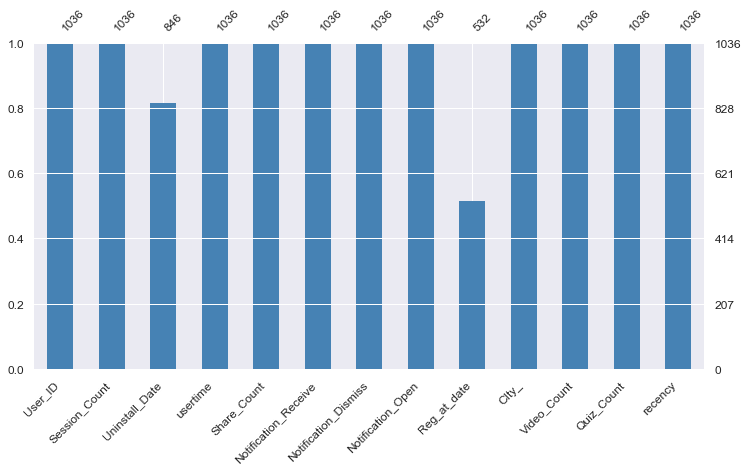

In [50]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')

In [51]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date          190
usertime                  0
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                     0
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# uninstall date for those variable which are null am setting it at the present date 
# 23-09-2020
# as the client are yet using the application 
# as i want to create a recency column for date 

In [52]:
data.loc[(data.Uninstall_Date.isnull()), "Uninstall_Date"]='2020-09-23'

In [53]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date            0
usertime                  0
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                     0
Video_Count               0
Quiz_Count                0
recency                   0
dtype: int64

# Session count is a record of the number of times a user visits your website within a given timeframe, such as day, week, or month
# considering a person usage in a month 
# as the max usage is 375 
# 1 one timevisit 
# 1-20 low
# 20-850 medium visit 
# 50-80 high visit
# 80 very high 

In [54]:
def session_Countnew(session_Count):
    a=''
    if (session_Count==1.0):
        a='onetime'
    elif(session_Count<=20.0):
        a='low'
    elif(session_Count<=50.0):
        a='medium'
    elif(session_Count<=80.0):
        a='high'
    else:
        a='veryhigh'
    return a
data['session_Countnew']=data['Session_Count'].map(session_Countnew)

In [55]:
data.isnull().sum()

User_ID                   0
Session_Count             0
Uninstall_Date            0
usertime                  0
Share_Count               0
Notification_Receive      0
Notification_Dismiss      0
Notification_Open         0
Reg_at_date             504
CIty_                     0
Video_Count               0
Quiz_Count                0
recency                   0
session_Countnew          0
dtype: int64

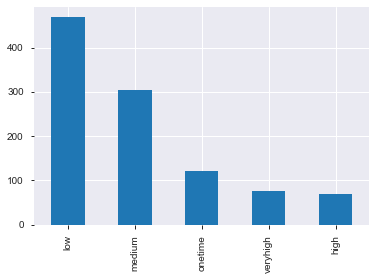

In [56]:
data.session_Countnew.value_counts().plot(kind="bar")

# Share Counts is the official tally of how many times a link has been shared on a social network, according to the social network.

# # 1 one timevisit 
# 1-20 low
# 20-850 medium visit 
# 50-80 high visit
# 80 very high 

In [57]:
def share_Countnew(share_Count):
    a=''
    if (share_Count==1.0):
        a='onetime'
    elif(share_Count<=20.0):
        a='low'
    elif(share_Count<=50.0):
        a='medium'
    elif(share_Count<=80.0):
        a='high'
    else:
        a='veryhigh'
    return a
data['share_Countnew']=data['Share_Count'].map(share_Countnew)

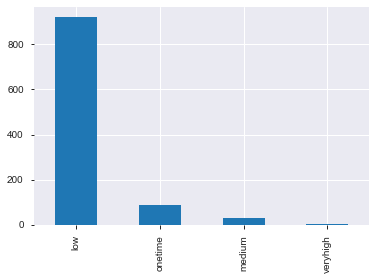

In [58]:
data.share_Countnew.value_counts().plot(kind="bar")

# Notification received

In [59]:
def notification_Receivenew(notification_Receive):
    a=''
    if (notification_Receive==1.0):
        a='one'
    elif(notification_Receive<=20.0):
        a='few'
    elif(notification_Receive<=50.0):
        a='average'
    elif(notification_Receive<=80.0):
        a='many'
    else:
        a='excess'
    return a
data['notification_Receivenew']=data['Notification_Receive'].map(notification_Receivenew)

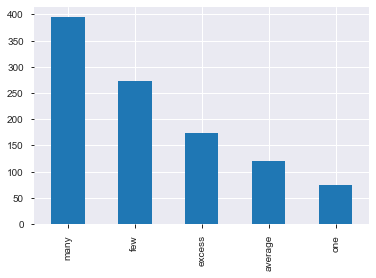

In [60]:
data.notification_Receivenew.value_counts().plot(kind='bar')

# Notification dismiss

In [61]:
def notification_Dismissnew(notification_Dismiss):
    a=''
    if (notification_Dismiss==1.0):
        a='one'
    elif(notification_Dismiss<=20.0):
        a='few'
    elif(notification_Dismiss<=50.0):
        a='average'
    elif(notification_Dismiss<=80.0):
        a='many'
    else:
        a='excess'
    return a
data['notification_Dismissnew']=data['Notification_Dismiss'].map(notification_Dismissnew)

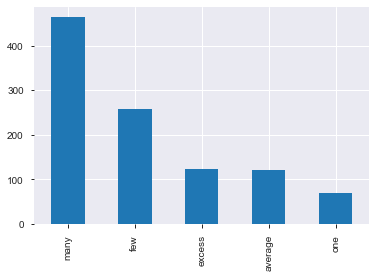

In [62]:
data.notification_Dismissnew.value_counts().plot(kind='bar')

# Notification open

In [63]:
def notification_Opennew(notification_Open):
    a=''
    if (notification_Open==1.0):
        a='one'
    elif(notification_Open<=10.0):
        a='few'
    elif(notification_Open<=20.0):
        a='average'
    elif(notification_Open<=30.0):
        a='many'
    else:
        a='excess'
    return a
data['notification_Opennew']=data['Notification_Open'].map(notification_Opennew)

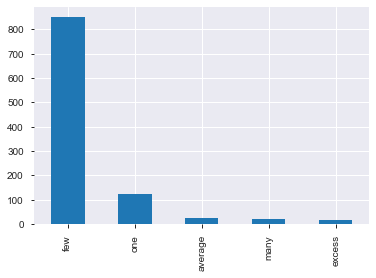

In [64]:
data.notification_Opennew.value_counts().plot(kind='bar')

# Video counts

In [65]:
def Video_Countnew(Video_Count):
    a=''
    if (Video_Count==1.0):
        a='one'
    elif(Video_Count<=10.0):
        a='few'
    elif(Video_Count<=20.0):
        a='average'
    elif(Video_Count<=30.0):
        a='many'
    else:
        a='excess'
    return a
data['Video_Countnew']=data['Video_Count'].map(Video_Countnew)

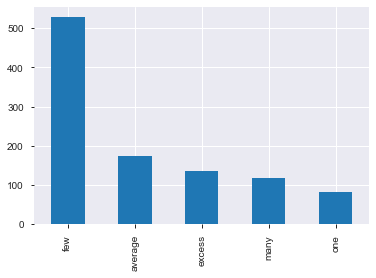

In [66]:
data.Video_Countnew.value_counts().plot(kind='bar')

In [67]:
def quiz_Countnew(quiz_Count):
    a=''
    if (quiz_Count==0):
        a='notattended'
    elif(quiz_Count<=10):
        a='few'
    elif(quiz_Count<=30):
        a='average'
    elif(quiz_Count<=50):
        a='many'
    else:
        a='excess'
    return a
data['quiz_Countnew']=data['Quiz_Count'].map(quiz_Countnew)

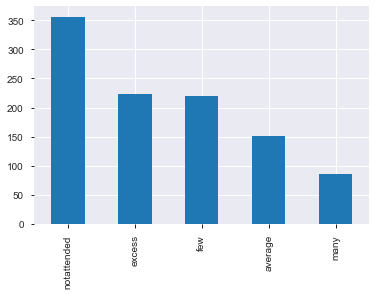

In [68]:
data.quiz_Countnew.value_counts().plot(kind='bar')

In [69]:
data.isnull().sum()

User_ID                      0
Session_Count                0
Uninstall_Date               0
usertime                     0
Share_Count                  0
Notification_Receive         0
Notification_Dismiss         0
Notification_Open            0
Reg_at_date                504
CIty_                        0
Video_Count                  0
Quiz_Count                   0
recency                      0
session_Countnew             0
share_Countnew               0
notification_Receivenew      0
notification_Dismissnew      0
notification_Opennew         0
Video_Countnew               0
quiz_Countnew                0
dtype: int64

# so i took columns session count and share count converted them in to category and compared them to get the date value 

# REGISTRATION DATE 

In [70]:
data[pd.isnull(data.Reg_at_date)]

User_ID  Session_Count       Uninstall_Date  usertime  Share_Count  \
4        1781           14.0  2018-09-14 00:00:00  6104.008          7.0   
10       1794            4.0  2018-10-18 00:00:00   648.427          7.0   
12       1799           14.0  2018-11-12 00:00:00  3354.579          1.0   
13       1802            4.0           2020-09-23  1851.413          7.0   
15       1809           28.0  2018-10-29 00:00:00    48.914          7.0   
20       1817            2.0  2018-11-15 00:00:00   301.800          7.0   
21       1818            7.0           2020-09-23   268.247          1.0   
25       1907            3.0           2020-09-23   146.161          7.0   
26       1908           14.0  2018-11-11 00:00:00   914.388          7.0   
28       1915            1.0  2018-10-01 00:00:00    43.725          7.0   
29       1924            1.0  2018-10-31 00:00:00   562.456          7.0   
32       1960            1.0  2019-01-07 00:00:00   358.828          7.0   
33       1963            8.0  2018-09-05 00:00:00  2747.054          7.0   
36       1980           24.0  2018-09-13 00:00:00  3385.465          3.0   
39       1985            5.0  2018-09-18 00:00:00  4093.150          7.0   
42       1989           28.0  2018-09-14 00:00:00   176.060          7.0   
43       1992           28.0  2018-09-17 00:00:00  1313.395          7.0   
47       2000           28.0  2018-09-21 00:00:00  1771.786          7.0   
48       2001            3.0           2020-09-23   123.861          7.0   
49       2002            5.0           2020-09-23  1841.262          7.0   
53       2007            2.0  2018-09-24 00:00:00   587.068          7.0   
54       2008           11.0           2020-09-23  4578.965          7.0   
55       2009            2.0  2018-09-19 00:00:00  1075.284          7.0   
56       2018            1.0  2018-10-10 00:00:00   426.622          7.0   
57       2021           17.0  2018-10-16 00:00:00  6964.313          7.0   
58       2022            8.0  2018-09-25 00:00:00  2236.424          7.0   
60       2025           28.0  2018-09-20 00:00:00   341.621          7.0   
69       2044            1.0           2020-09-23   866.834          7.0   
70       2045            6.0  2018-11-16 00:00:00  1518.838          7.0   
73       2048            1.0  2018-12-04 00:00:00   167.534          7.0   
...       ...            ...                  ...       ...          ...   
909      3113            3.0  2019-01-30 00:00:00   528.400          7.0   
911      3116           28.0  2018-11-20 00:00:00   309.548          7.0   
922      3140            1.0  2018-11-27 00:00:00   386.456          1.0   
923      3141            1.0  2018-11-16 00:00:00   411.683          7.0   
930      3151            8.0           2020-09-23  1005.127          7.0   
934      3156           28.0  2019-01-20 00:00:00  2845.673          7.0   
935      3157            1.0           2020-09-23   355.482          7.0   
937      3159            8.0  2018-11-22 00:00:00  1669.954          7.0   
938      3160            9.0  2018-11-18 00:00:00  3985.881          2.0   
943      3165           28.0  2018-11-16 00:00:00   329.691          7.0   
944      3166            6.0  2018-11-17 00:00:00  2850.415          6.0   
945      3167           28.0  2018-11-17 00:00:00   402.342          7.0   
952      3174            1.0           2020-09-23   324.576          7.0   
961      3184            5.0  2019-02-18 00:00:00  1063.800          7.0   
972      3196            2.0  2018-12-21 00:00:00   213.080          7.0   
973      3197            2.0  2018-11-20 00:00:00   602.128          7.0   
986      3210            2.0  2018-11-19 00:00:00   719.828          1.0   
988      3212           28.0  2018-11-18 00:00:00   630.968          7.0   
1002     3226            3.0  2018-11-30 00:00:00  1954.190          7.0   
1004     3228            2.0           2020-09-23   397.450          7.0   
1005     3229            4.0  2018-12-08 00:00:00  230

In [71]:
data[(data.session_Countnew=='low')&(data.share_Countnew=='low')]['Reg_at_date'].value_counts()

2018-11-22    13
2018-11-23    13
2018-11-28    11
2019-01-12     6
2018-11-27     6
2018-11-24     6
2018-11-29     6
2019-01-27     5
2019-01-05     4
2018-12-04     4
2018-11-26     4
2018-12-03     4
2018-12-22     3
2019-01-19     3
2019-01-11     3
2018-11-30     3
2019-01-17     3
2018-11-25     3
2018-12-07     3
2018-12-29     2
2018-12-20     2
2018-12-14     2
2019-01-06     2
2018-12-15     2
2019-01-31     2
2019-01-21     2
2019-01-08     2
2019-01-13     2
2019-01-07     2
2019-01-04     2
              ..
2019-01-29     1
2019-07-23     1
2018-12-12     1
2019-02-01     1
2019-04-12     1
2019-01-15     1
2019-02-09     1
2019-02-14     1
2019-01-23     1
2019-05-10     1
2018-12-24     1
2019-01-10     1
2019-03-30     1
2019-01-30     1
2019-05-20     1
2019-02-02     1
2018-12-19     1
2018-12-05     1
2019-01-22     1
2018-12-25     1
2018-12-11     1
2019-03-14     1
2018-12-28     1
2019-01-14     1
2019-06-25     1
2019-06-18     1
2019-01-03     1
2019-04-23    

In [72]:
data[(data.session_Countnew=='low')&(data.share_Countnew=='onetime')]['Reg_at_date'].value_counts()

2019-01-02    2
2018-12-03    2
2018-11-25    2
2019-01-26    2
2018-11-24    2
2018-12-16    2
2019-02-02    2
2018-12-05    2
2018-11-23    2
2018-11-28    1
2018-11-27    1
2018-12-22    1
2019-01-10    1
2019-06-21    1
2019-01-04    1
2018-12-29    1
2018-11-29    1
2018-12-17    1
2018-12-01    1
2019-03-30    1
2019-01-12    1
2019-02-06    1
2019-02-25    1
2018-12-08    1
2019-01-14    1
2019-01-08    1
2018-12-21    1
Name: Reg_at_date, dtype: int64

In [73]:
data[(data.session_Countnew=='low')&(data.share_Countnew=='medium')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [74]:
data[(data.session_Countnew=='low')&(data.share_Countnew=='veryhigh')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [75]:
data[(data.session_Countnew=='medium')&(data.share_Countnew=='low')]['Reg_at_date'].value_counts()

2018-11-23    26
2018-11-22    25
2018-11-26    10
2018-11-24     7
2018-11-27     6
2018-11-29     5
2018-12-30     5
2018-11-28     5
2018-12-05     4
2018-12-03     3
2018-12-06     3
2018-11-25     3
2018-12-15     2
2018-12-29     2
2018-12-08     2
2018-12-14     2
2018-12-01     1
2019-01-18     1
2019-03-26     1
2018-12-09     1
2019-01-09     1
2019-01-12     1
2018-12-26     1
2019-03-29     1
2019-01-15     1
2018-12-18     1
2019-05-16     1
2019-01-29     1
2019-08-03     1
2019-01-21     1
2018-12-31     1
2018-12-20     1
2019-01-05     1
2019-02-07     1
2018-12-24     1
2018-12-13     1
2018-12-16     1
2018-12-02     1
2018-12-19     1
2019-01-19     1
2018-11-21     1
2018-12-17     1
2019-01-22     1
2018-12-25     1
2018-12-11     1
2019-01-11     1
2018-11-30     1
2018-12-07     1
2019-01-31     1
2019-01-04     1
Name: Reg_at_date, dtype: int64

In [76]:
data[(data.session_Countnew=='medium')&(data.share_Countnew=='onetime')]['Reg_at_date'].value_counts()

2018-11-22    4
2018-11-23    3
2018-11-25    3
2019-01-27    1
2018-11-29    1
2018-12-17    1
2019-01-23    1
2019-01-04    1
2018-12-10    1
2019-01-16    1
2018-11-24    1
2018-12-28    1
2018-11-30    1
Name: Reg_at_date, dtype: int64

In [77]:
data[(data.session_Countnew=='medium')&(data.share_Countnew=='medium')]['Reg_at_date'].value_counts()

2019-01-10    1
2018-11-23    1
Name: Reg_at_date, dtype: int64

In [78]:
data[(data.session_Countnew=='medium')&(data.share_Countnew=='veryhigh')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [79]:
data[(data.session_Countnew=='onetime')&(data.share_Countnew=='low')]['Reg_at_date'].value_counts()

2019-01-26    1
2019-01-31    1
2019-01-10    1
2018-12-03    1
2018-11-26    1
2019-01-27    1
2019-01-08    1
2019-01-30    1
2018-12-16    1
2019-01-28    1
2018-12-21    1
Name: Reg_at_date, dtype: int64

In [80]:
data[(data.session_Countnew=='onetime')&(data.share_Countnew=='onetime')]['Reg_at_date'].value_counts()

2018-11-26    1
2018-12-27    1
Name: Reg_at_date, dtype: int64

In [81]:
data[(data.session_Countnew=='onetime')&(data.share_Countnew=='medium')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [82]:
data[(data.session_Countnew=='onetime')&(data.share_Countnew=='veryhigh')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [83]:
data[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='low')]['Reg_at_date'].value_counts()

2018-11-22    14
2018-11-23     9
2018-11-26     5
2018-11-24     4
2018-11-29     3
2018-11-28     3
2018-11-25     2
2018-12-01     2
2018-12-06     1
2018-12-30     1
2019-01-05     1
2018-12-11     1
2018-12-04     1
2018-12-10     1
2018-11-27     1
2018-12-28     1
Name: Reg_at_date, dtype: int64

In [84]:
data[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='onetime')]['Reg_at_date'].value_counts()

2018-11-26    1
2018-11-27    1
2018-12-04    1
Name: Reg_at_date, dtype: int64

In [85]:
data[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='medium')]['Reg_at_date'].value_counts()

2018-11-22    10
2018-12-24     2
2018-11-29     2
2018-11-26     2
2018-12-06     2
2018-11-23     2
2018-12-10     1
2018-11-24     1
Name: Reg_at_date, dtype: int64

In [86]:
data[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='veryhigh')]['Reg_at_date'].value_counts()

2019-04-19    1
Name: Reg_at_date, dtype: int64

In [87]:
data[(data.session_Countnew=='high')&(data.share_Countnew=='low')]['Reg_at_date'].value_counts()

2018-11-22    18
2018-11-23     7
2018-11-24     5
2018-11-27     5
2018-11-29     4
2018-12-29     2
2018-11-25     2
2019-01-09     2
2019-02-16     1
2018-12-19     1
2019-01-03     1
2019-01-08     1
2018-12-22     1
2018-12-16     1
2019-01-10     1
2018-12-14     1
2018-11-28     1
2019-01-20     1
2019-02-11     1
2018-12-01     1
2018-12-24     1
2019-01-02     1
2018-12-07     1
2018-12-31     1
2018-11-30     1
2018-11-26     1
Name: Reg_at_date, dtype: int64

In [88]:
data[(data.session_Countnew=='high')&(data.share_Countnew=='onetime')]['Reg_at_date'].value_counts()

2018-11-22    2
2018-11-27    1
Name: Reg_at_date, dtype: int64

In [89]:
data[(data.session_Countnew=='high')&(data.share_Countnew=='medium')]['Reg_at_date'].value_counts()

2018-11-24    1
2018-11-23    1
2018-12-02    1
Name: Reg_at_date, dtype: int64

In [90]:
data[(data.session_Countnew=='high')&(data.share_Countnew=='veryhigh')]['Reg_at_date'].value_counts()

Series([], Name: Reg_at_date, dtype: int64)

In [91]:
data.loc[(data.session_Countnew=='low')&(data.share_Countnew=='low')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='low')&(data.share_Countnew=='onetime')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2019-01-02'
data.loc[(data.session_Countnew=='medium')&(data.share_Countnew=='low')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-23'
data.loc[(data.session_Countnew=='medium')&(data.share_Countnew=='onetime')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='medium')&(data.share_Countnew=='medium')&(data.Reg_at_date.isnull()), "Reg_at_date"]='22019-01-10'
data.loc[(data.session_Countnew=='onetime')&(data.share_Countnew=='low')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2019-01-26'
data.loc[(data.session_Countnew=='onetime')&(data.share_Countnew=='onetime')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-26'
data.loc[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='low')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='onetime')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-26'
data.loc[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='medium')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='veryhigh')&(data.share_Countnew=='veryhigh')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2019-04-19'
data.loc[(data.session_Countnew=='high')&(data.share_Countnew=='low')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='high')&(data.share_Countnew=='onetime')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-22'
data.loc[(data.session_Countnew=='high')&(data.share_Countnew=='medium')&(data.Reg_at_date.isnull()), "Reg_at_date"]='2018-11-24'

In [92]:
data.isnull().sum()

User_ID                    0
Session_Count              0
Uninstall_Date             0
usertime                   0
Share_Count                0
Notification_Receive       0
Notification_Dismiss       0
Notification_Open          0
Reg_at_date                0
CIty_                      0
Video_Count                0
Quiz_Count                 0
recency                    0
session_Countnew           0
share_Countnew             0
notification_Receivenew    0
notification_Dismissnew    0
notification_Opennew       0
Video_Countnew             0
quiz_Countnew              0
dtype: int64

In [93]:
data.head()

User_ID  Session_Count       Uninstall_Date   usertime  Share_Count  \
0      567            4.0  2019-01-07 00:00:00  35522.331          7.0   
1     1777           16.0  2018-10-05 00:00:00  16251.738          7.0   
2     1778          401.0  2019-03-08 00:00:00  48032.113         49.0   
3     1780          226.0  2019-08-28 00:00:00  25157.275         11.0   
4     1781           14.0  2018-09-14 00:00:00   6104.008          7.0   

   Notification_Receive  Notification_Dismiss  Notification_Open  \
0                   1.0                  52.1               7.33   
1                   7.0                   3.0               4.00   
2                 279.0                  32.0              30.00   
3                 342.0                 227.0              57.00   
4                   2.0                   2.0               7.33   

           Reg_at_date   CIty_  Video_Count  Quiz_Count  recency  \
0  2019-01-07 00:00:00  Mumbai            0           0        0   
1  2018-11-23 00:00:00  Mumbai            5          13       49   
2  2018-11-22 00:00:00  Mumbai           28          38     -106   
3  2018-11-25 00:00:00  Mumbai           49          87     -276   
4           2018-11-22  Mumbai            4           8   -43357   

  session_Countnew share_Countnew notification_Receivenew  \
0              low            low                     one   
1              low            low                     few   
2         veryhigh         medium                  excess   
3         veryhigh            low                  excess   
4              low            low                     few   

  notification_Dismissnew notification_Opennew Video_Countnew quiz_Countnew  
0                    many                  few            few   notattended  
1                     few                  few            few       average  
2                 average                 many           many          many  
3                  excess               excess         excess        excess  
4                     few                  few            few           few

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 20 columns):
User_ID                    1036 non-null int64
Session_Count              1036 non-null float64
Uninstall_Date             1036 non-null object
usertime                   1036 non-null float64
Share_Count                1036 non-null float64
Notification_Receive       1036 non-null float64
Notification_Dismiss       1036 non-null float64
Notification_Open          1036 non-null float64
Reg_at_date                1036 non-null object
CIty_                      1036 non-null object
Video_Count                1036 non-null int64
Quiz_Count                 1036 non-null int64
recency                    1036 non-null int64
session_Countnew           1036 non-null object
share_Countnew             1036 non-null object
notification_Receivenew    1036 non-null object
notification_Dismissnew    1036 non-null object
notification_Opennew       1036 non-null object
Video_Countnew             

In [95]:
df1=data.copy()

In [96]:
df1.head()

User_ID  Session_Count       Uninstall_Date   usertime  Share_Count  \
0      567            4.0  2019-01-07 00:00:00  35522.331          7.0   
1     1777           16.0  2018-10-05 00:00:00  16251.738          7.0   
2     1778          401.0  2019-03-08 00:00:00  48032.113         49.0   
3     1780          226.0  2019-08-28 00:00:00  25157.275         11.0   
4     1781           14.0  2018-09-14 00:00:00   6104.008          7.0   

   Notification_Receive  Notification_Dismiss  Notification_Open  \
0                   1.0                  52.1               7.33   
1                   7.0                   3.0               4.00   
2                 279.0                  32.0              30.00   
3                 342.0                 227.0              57.00   
4                   2.0                   2.0               7.33   

           Reg_at_date   CIty_  Video_Count  Quiz_Count  recency  \
0  2019-01-07 00:00:00  Mumbai            0           0        0   
1  2018-11-23 00:00:00  Mumbai            5          13       49   
2  2018-11-22 00:00:00  Mumbai           28          38     -106   
3  2018-11-25 00:00:00  Mumbai           49          87     -276   
4           2018-11-22  Mumbai            4           8   -43357   

  session_Countnew share_Countnew notification_Receivenew  \
0              low            low                     one   
1              low            low                     few   
2         veryhigh         medium                  excess   
3         veryhigh            low                  excess   
4              low            low                     few   

  notification_Dismissnew notification_Opennew Video_Countnew quiz_Countnew  
0                    many                  few            few   notattended  
1                     few                  few            few       average  
2                 average                 many           many          many  
3                  excess               excess         excess        excess  
4                     few                  few            few           few

In [97]:
df1.drop(['Uninstall_Date','User_ID','session_Countnew','share_Countnew','notification_Receivenew','notification_Dismissnew','notification_Opennew','Video_Countnew','quiz_Countnew','Reg_at_date'], axis=1,inplace=True)

In [98]:
df1.head()

Session_Count   usertime  Share_Count  Notification_Receive  \
0            4.0  35522.331          7.0                   1.0   
1           16.0  16251.738          7.0                   7.0   
2          401.0  48032.113         49.0                 279.0   
3          226.0  25157.275         11.0                 342.0   
4           14.0   6104.008          7.0                   2.0   

   Notification_Dismiss  Notification_Open   CIty_  Video_Count  Quiz_Count  \
0                  52.1               7.33  Mumbai            0           0   
1                   3.0               4.00  Mumbai            5          13   
2                  32.0              30.00  Mumbai           28          38   
3                 227.0              57.00  Mumbai           49          87   
4                   2.0               7.33  Mumbai            4           8   

   recency  
0        0  
1       49  
2     -106  
3     -276  
4   -43357

In [99]:
df1.drop(['CIty_'], axis=1,inplace=True)

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=StandardScaler()
scaled_train = pd.DataFrame(sc.fit_transform(df1),columns=['Session_Count','usertime','Share_Count','Notification_Receive','Notification_Dismiss','Notification_Open','Video_Count','Quiz_Count','recency'])
scaled_train.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
0      -0.553242  3.336890    -0.005615             -0.693958   
1      -0.277563  1.166031    -0.005615             -0.630549   
2       8.567123  4.746134     7.398271              2.243979   
3       4.546811  2.169252     0.699517              2.909770   
4      -0.323510  0.022875    -0.005615             -0.683390   

   Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  
0             -0.000010          -0.000300    -0.762578   -0.743981  0.496147  
1             -0.743419          -0.400307    -0.459349   -0.325210  0.497990  
2             -0.304338           2.722868     0.935499    0.480119  0.492162  
3              2.648098           5.966166     2.209057    2.058564  0.485770  
4             -0.758559          -0.000300    -0.519995   -0.486276 -1.134068

In [101]:
from sklearn.cluster import KMeans


In [102]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(scaled_train)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1     9324.000000
1              2     6583.940868
2              3     5475.514723
3              4     4423.042941
4              5     3799.228196
5              6     3291.719649
6              7     3023.543000
7              8     2812.502046
8              9     2652.664970
9             10     2521.501978
10            11     2368.964756
11            12     2279.457434
12            13     2194.924888
13            14     2089.179469

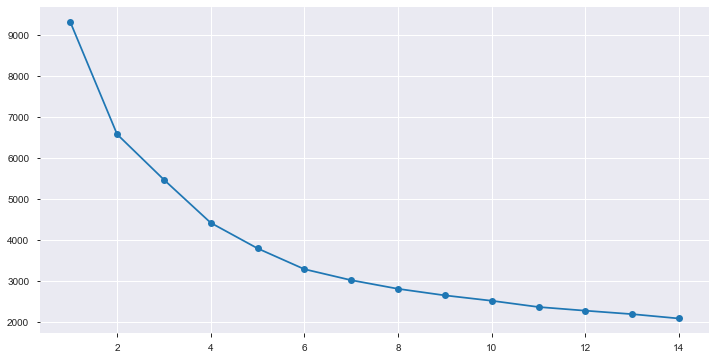

In [103]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [104]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [105]:
kmeans.fit(scaled_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [106]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(scaled_train) )
centroid_df

Session_Count  usertime  Share_Count  Notification_Receive  \
0       1.346825  1.466412     0.694281              0.726456   
1      -0.326209 -0.355174    -0.168159             -0.175952   

   Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  
0              0.658850           0.538769     1.495120    1.556230  0.751098  
1             -0.159578          -0.130493    -0.362127   -0.376929 -0.181921

In [107]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [108]:
df_labeled = scaled_train.join(df_labels)

In [109]:
df_clusters = df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=df_clusters.get_group(0)
df1=df_clusters.get_group(1)

In [110]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]

In [111]:
finaldf=pd.concat([df0,df1])
finaldf.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
2        8.567123  4.746134     7.398271              2.243979   
3        4.546811  2.169252     0.699517              2.909770   
7        1.238669  2.502524    -0.181898             -0.619981   
9        1.790026  0.721929    -1.063313              4.294193   
11       1.767052  1.536166     2.462347              0.278309   

    Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count  \
2              -0.304338           2.722868     0.935499    0.480119   
3               2.648098           5.966166     2.209057    2.058564   
7              -0.758559          -0.760673     3.300678    1.961925   
9               2.284721           0.921036     1.966475    2.187417   
11              0.482978          -0.760673     0.935499    1.865285   

     recency labels  
2   0.492162      0  
3   0.485770      0  
7   0.487198      0  
9   2.129408      0  
11  0.492801      0

In [112]:
finaldf.labels.value_counts()

1    834
0    202
Name: labels, dtype: int64

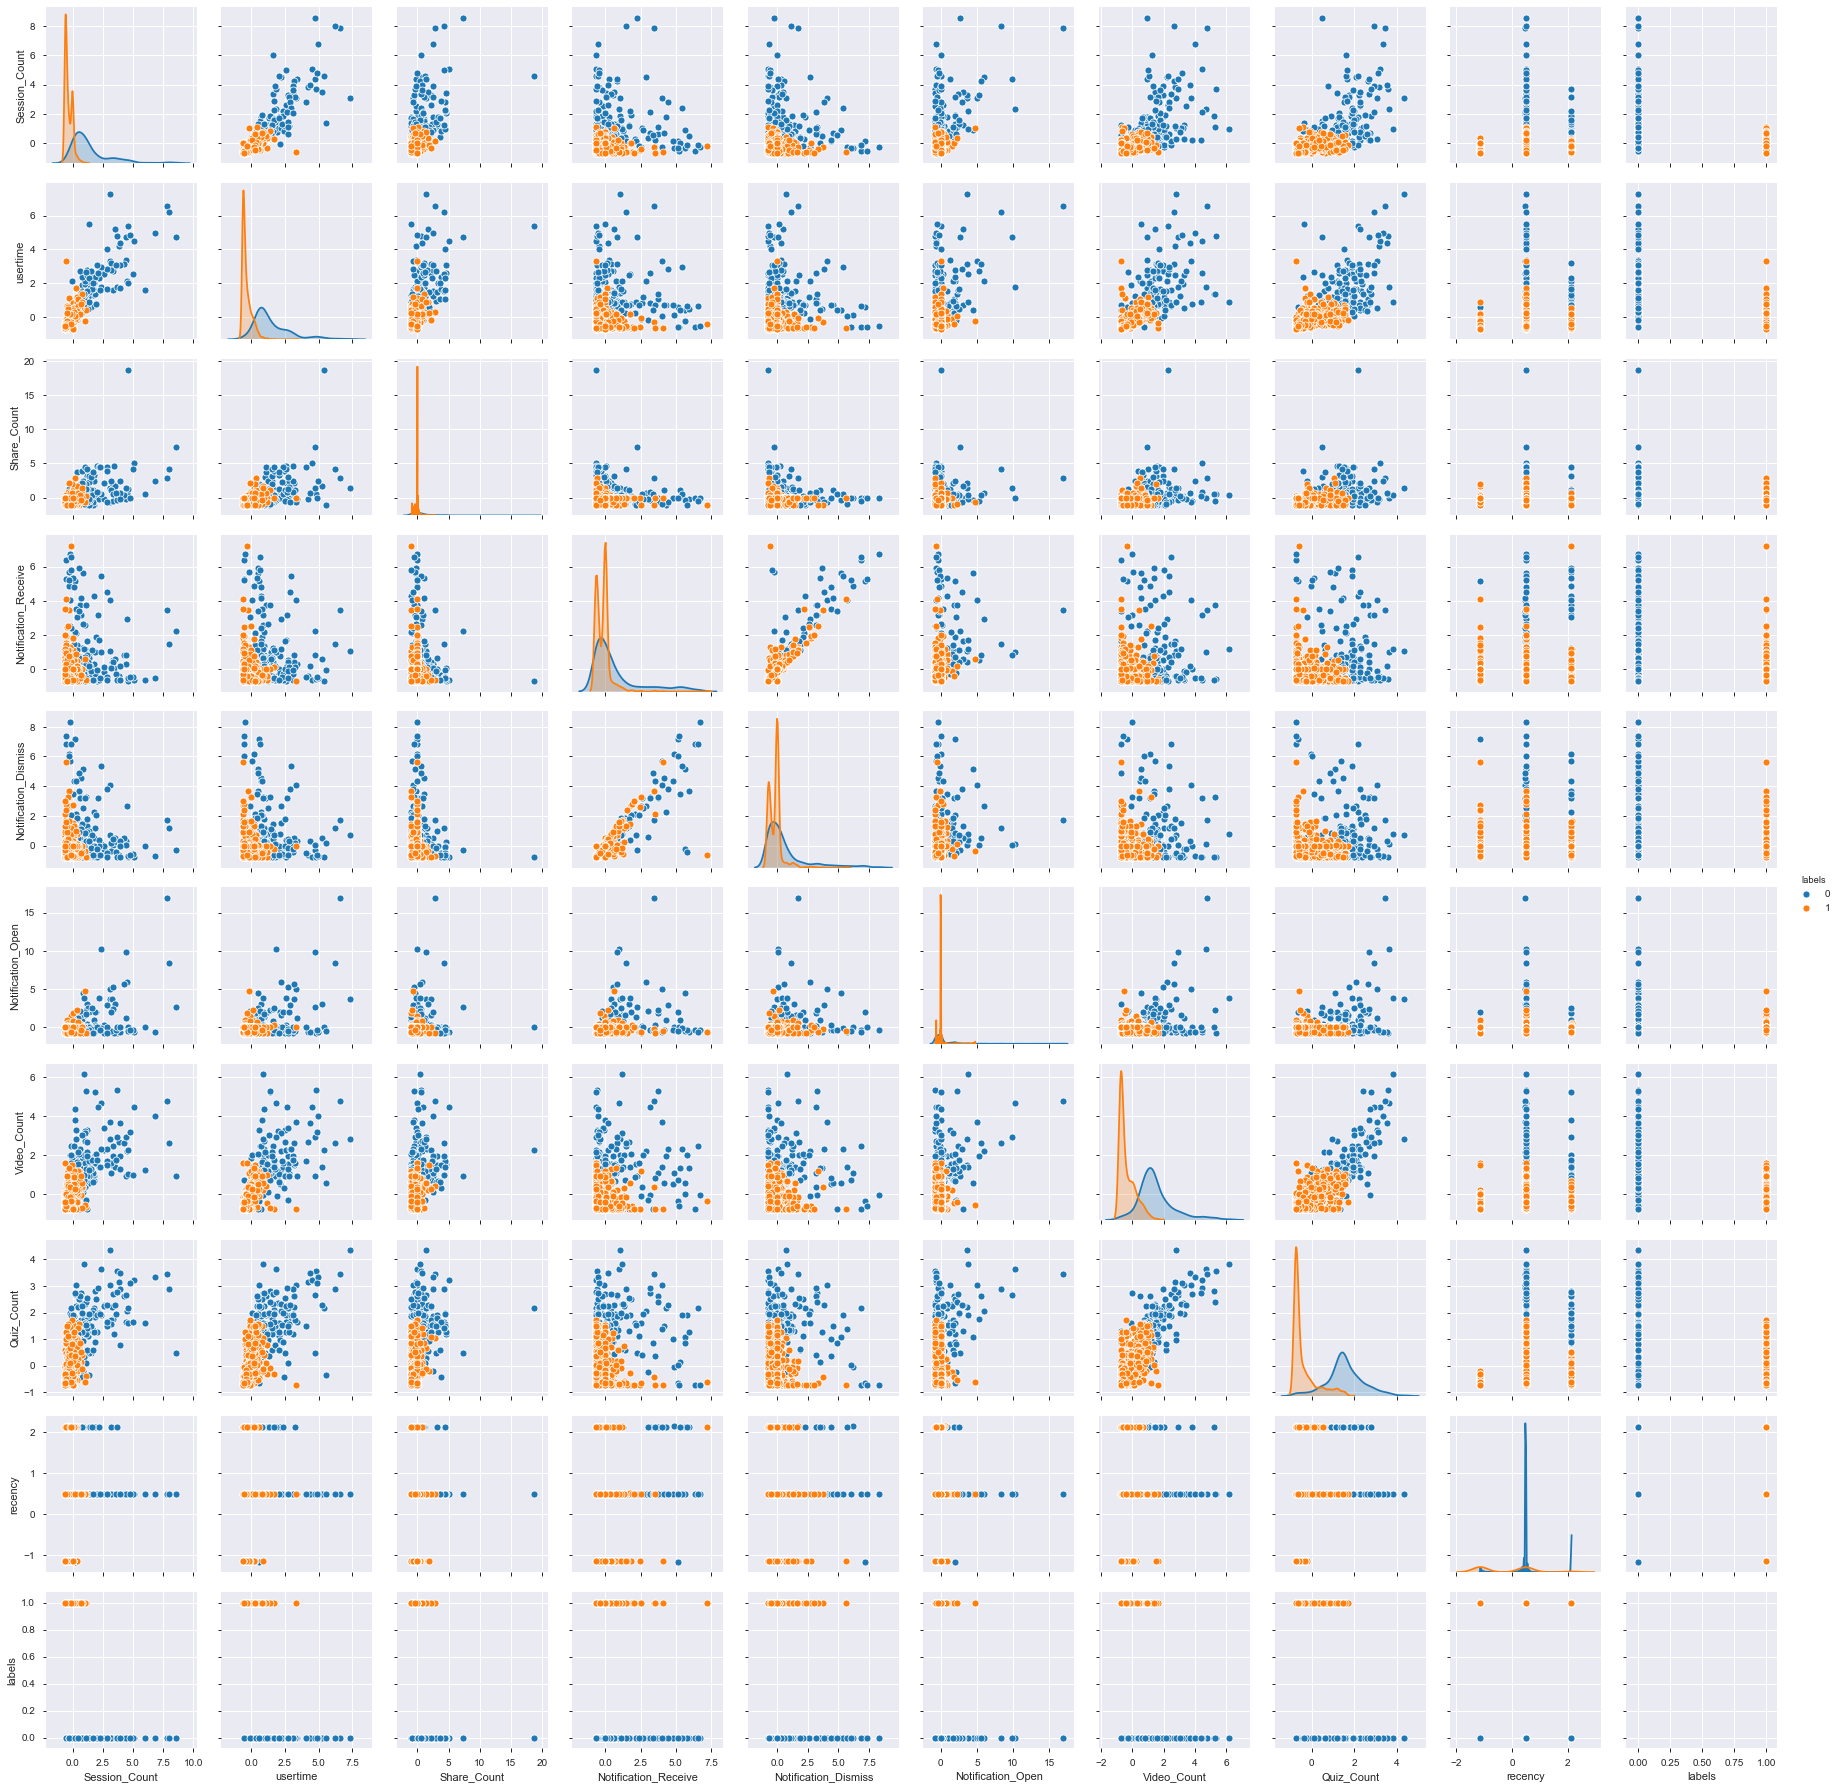

In [154]:
sns.pairplot(finaldf,diag_kind='kde',hue='labels')

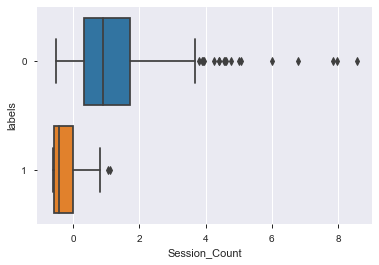

In [155]:
sns.boxplot(x='Session_Count',y='labels',data=finaldf)

# the more session count,usertime	Share_Count	Notification_Receive	Notification_Dismiss	Notification_Open	Video_Count	Quiz_Countless less chances of person uninstalling the app 


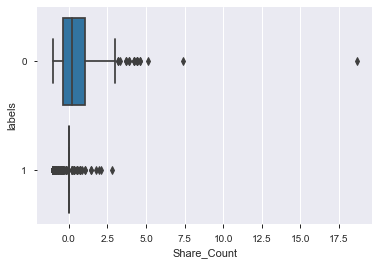

In [157]:
sns.boxplot(x='Share_Count',y='labels',data=finaldf)

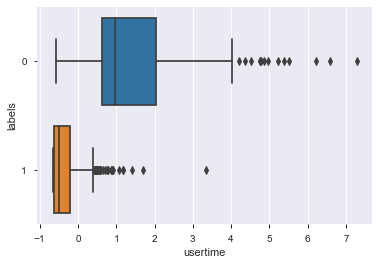

In [158]:
sns.boxplot(x='usertime',y='labels',data=finaldf)

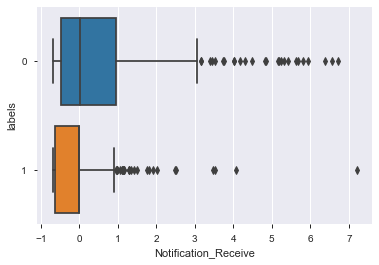

In [159]:
sns.boxplot(x='Notification_Receive',y='labels',data=finaldf)

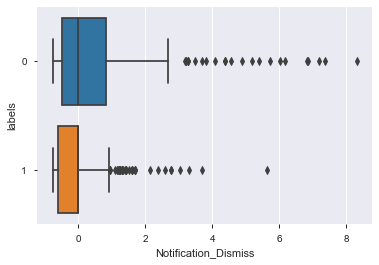

In [160]:
sns.boxplot(x='Notification_Dismiss',y='labels',data=finaldf)

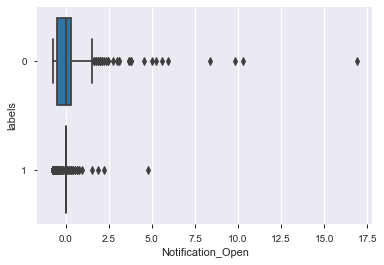

In [161]:
sns.boxplot(x='Notification_Open',y='labels',data=finaldf)

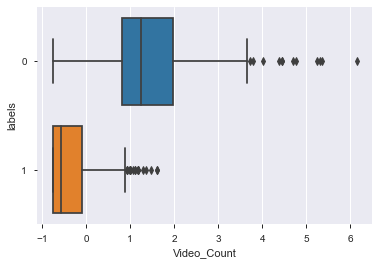

In [162]:
sns.boxplot(x='Video_Count',y='labels',data=finaldf)

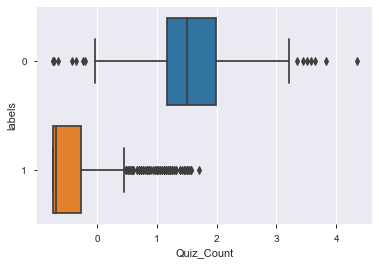

In [163]:
sns.boxplot(x='Quiz_Count',y='labels',data=finaldf)

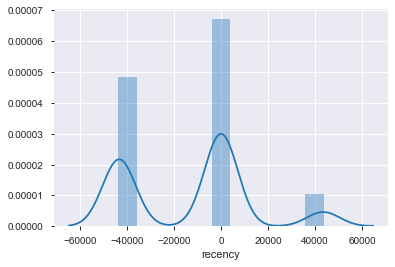

In [165]:
sns.distplot(data.recency)

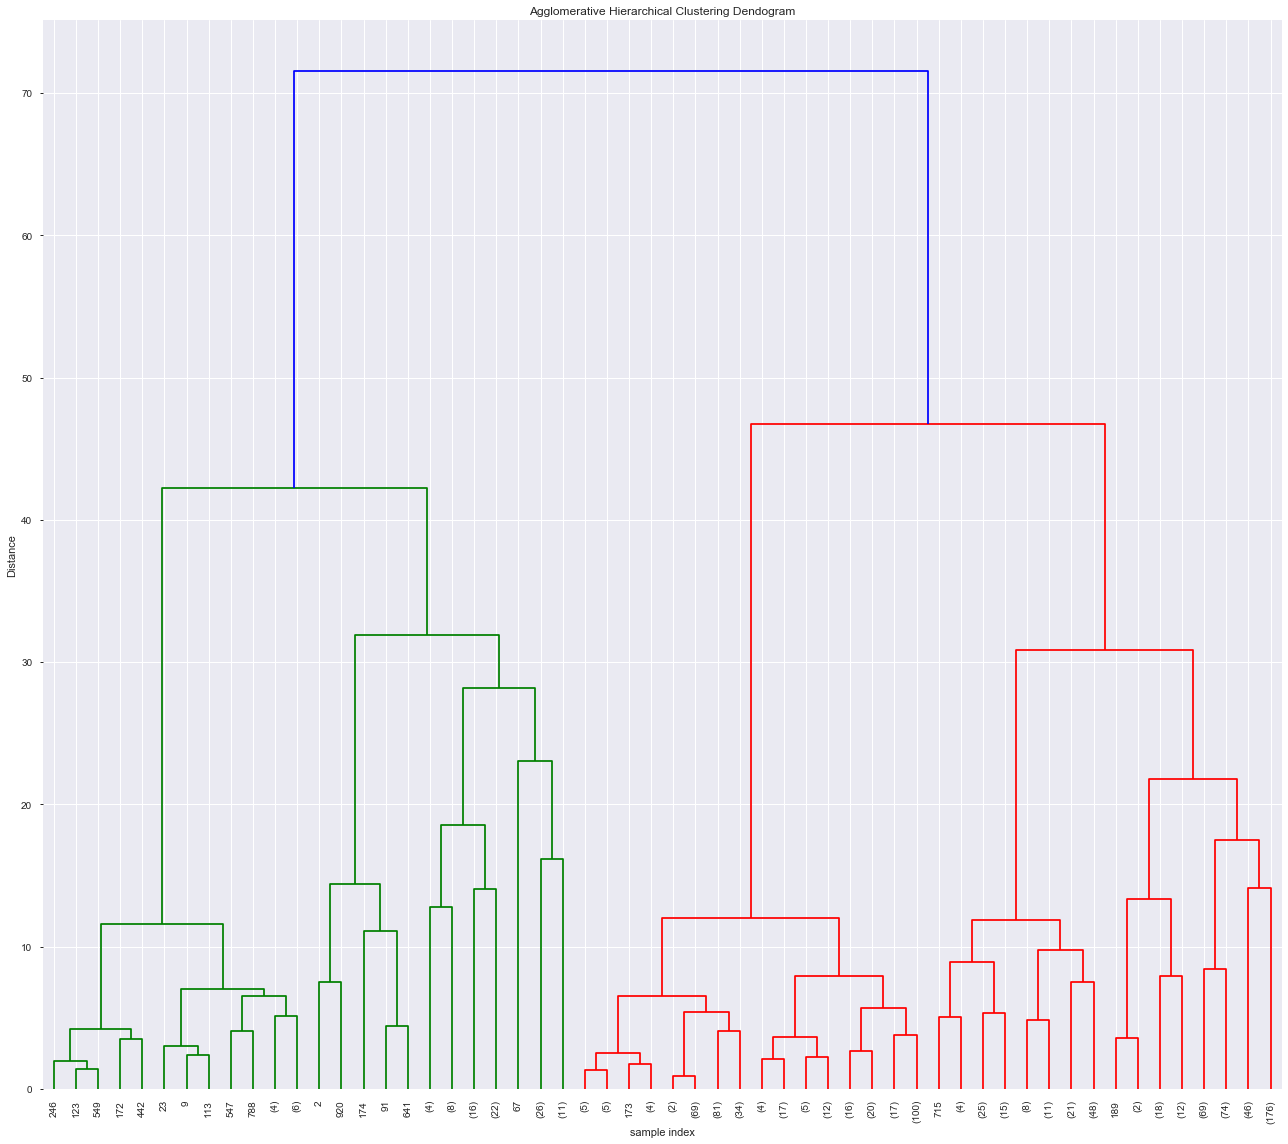

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(scaled_train, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=50,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

# User_status=1 : Customer will Uninstall the App
# User_status=0 : Customer will not uninstall the App.

# #  Expand and randomize the data for about 30,000 users


In [114]:
df5=finaldf.copy()
df5.shape

(1036, 10)

In [115]:
y=df5.labels
x=df5.drop(['labels'],axis=1,inplace=True)

In [116]:
scaled_train1= pd.DataFrame(sc.fit_transform(df5),columns=[
'Session_Count','usertime','Share_Count','Notification_Receive','Notification_Dismiss','Notification_Open','Video_Count','Quiz_Count','recency'
])
scaled_train1.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
0       8.567123  4.746134     7.398271              2.243979   
1       4.546811  2.169252     0.699517              2.909770   
2       1.238669  2.502524    -0.181898             -0.619981   
3       1.790026  0.721929    -1.063313              4.294193   
4       1.767052  1.536166     2.462347              0.278309   

   Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  
0             -0.304338           2.722868     0.935499    0.480119  0.492162  
1              2.648098           5.966166     2.209057    2.058564  0.485770  
2             -0.758559          -0.760673     3.300678    1.961925  0.487198  
3              2.284721           0.921036     1.966475    2.187417  2.129408  
4              0.482978          -0.760673     0.935499    1.865285  0.492801

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_train1,y,test_size=0.3,random_state=7)

In [118]:
from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='all')
xtrain_reset,ytrain_reset=s.fit_sample(X_train,Y_train)
xtest_reset,ytest_reset=s.fit_sample(X_test,Y_test)

Using TensorFlow backend.


In [119]:
xtrain_reset,ytrain_reset.shape

(array([[ 1.23866857,  0.70404516, -0.00561519, ..., -0.76257753,
          1.31766133,  0.48479206],
        [ 3.92653435,  1.75745923, -0.1818982 , ...,  1.2993731 ,
          0.77003759,  0.49152242],
        [-0.09377771,  0.03614585,  0.34695081, ...,  0.08646097,
         -0.38963622, -1.13654921],
        ...,
        [ 0.4985123 ,  0.49843788,  0.43365704, ..., -0.54686151,
          0.88850221,  0.48687278],
        [-0.18419138,  0.20845093,  0.81893055, ...,  1.41869846,
          1.31661712,  0.49218101],
        [ 0.07699366,  0.10583133,  0.13805987, ...,  1.56509333,
          1.48152002,  0.48733123]]), (1160,))

In [120]:
pd.DataFrame(xtrain_reset).shape

(1160, 9)

In [121]:
pd.DataFrame(xtest_reset).shape

(508, 9)

In [122]:
df5.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
2        8.567123  4.746134     7.398271              2.243979   
3        4.546811  2.169252     0.699517              2.909770   
7        1.238669  2.502524    -0.181898             -0.619981   
9        1.790026  0.721929    -1.063313              4.294193   
11       1.767052  1.536166     2.462347              0.278309   

    Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  
2              -0.304338           2.722868     0.935499    0.480119  0.492162  
3               2.648098           5.966166     2.209057    2.058564  0.485770  
7              -0.758559          -0.760673     3.300678    1.961925  0.487198  
9               2.284721           0.921036     1.966475    2.187417  2.129408  
11              0.482978          -0.760673     0.935499    1.865285  0.492801

# # 1)the customer that reg and uninstall at the same date 

In [123]:
data[(data.User_ID)&(data.recency==0)]

User_ID  Session_Count       Uninstall_Date   usertime  Share_Count  \
0         567            4.0  2019-01-07 00:00:00  35522.331          7.0   
25       1907            3.0           2020-09-23    146.161          7.0   
46       1999           94.0  2018-11-22 00:00:00  11380.729         13.0   
48       2001            3.0           2020-09-23    123.861          7.0   
79       2055           21.0           2020-09-23   4252.787          1.0   
85       2061            1.0           2020-09-23    659.529          7.0   
98       2083            7.0           2020-09-23    738.688          7.0   
106      2099            4.0  2019-06-22 00:00:00   1085.856          2.0   
110      2103           10.0           2020-09-23   2364.874          7.0   
123      2123            5.0           2020-09-23    771.913          7.0   
129      2129            5.0           2020-09-23   1162.146          7.0   
167      2183            2.0           2020-09-23    423.729          7.0   
181      2221            2.0           2020-09-23     55.184          7.0   
209      2261            6.0           2020-09-23   1158.027          7.0   
219      2271            1.0           2020-09-23    480.202          7.0   
240      2299           12.0           2020-09-23   1423.004          7.0   
246      2305           19.0           2020-09-23   1613.843          7.0   
249      2311           28.0           2020-09-23    122.490          7.0   
280      2349            5.0           2020-09-23    575.924          7.0   
304      2389            9.0           2020-09-23   1780.941          7.0   
325      2417            6.0           2020-09-23   1240.280          7.0   
331      2423            8.0           2020-09-23   1229.534          7.0   
346      2439            6.0           2020-09-23   2529.965          7.0   
348      2441            3.0           2020-09-23    123.858          7.0   
352      2445            2.0           2020-09-23    245.843          7.0   
362      2461            9.0           2020-09-23   2857.969          7.0   
369      2471            1.0           2020-09-23    261.199          7.0   
375      2477            2.0           2020-09-23    819.632          7.0   
425      2535            1.0           2020-09-23    665.889          7.0   
428      2539           28.0  2018-12-30 00:00:00    179.006          7.0   
...       ...            ...                  ...        ...          ...   
466      2585            6.0           2020-09-23   1821.900          7.0   
510      2629            7.0           2020-09-23   3063.998          7.0   
516      2635            1.0  2019-01-27 00:00:00   1110.818          7.0   
522      2641            1.0           2020-09-23    187.313          7.0   
549      2669            6.0           2020-09-23   1042.158          7.0   
551      2671           36.0  2018-11-23 00:00:00  10671.478          8.0   
571      2691            1.0           2020-09-23    164.870          7.0   
577      2697            4.0           2020-09-23   1776.639          7.0   
622      2747            2.0           2020-09-23   1117.000          7.0   
699      2833           28.0           2020-09-23    182.302          7.0   
704      2841           28.0           2020-09-23    145.469          7.0   
708      2845            7.0  2019-01-05 00:00:00   1509.636          3.0   
724      2865           27.0           2020-09-23   7493.194          1.0   
728      2871            2.0           2020-09-23    230.958          7.0   
731      2875           11.0           2020-09-23   2025.172          3.0   
739      2883            1.0           2020-09-23    485.169          1.0   
743      2887            2.0           2020-09-23   2822.028          7.0   
755      2899           12.0           2020-09-23   3383.061          7.0   
759      2903            3.0           2020-09-23   2177.452          7.0   
766      2917            7.0           2020-09-23   3178.891          4.0   
77

# b) A user didn't uninstall but also didn't spend any time on the app 


# i didnt need to change uninstall column as the customer didnt uninstall the application

In [124]:
data1=pd.read_excel("C:/Users/Eagle3y3/Desktop/project/Sample Data1.xlsx")

In [125]:
data1.head()

User ID  Session Count Uninstall Date   usertime  Share Count  \
0      567            4.0     2019-01-07  35522.331          NaN   
1     1777           16.0     2018-10-05  16251.738          NaN   
2     1778          401.0     2019-03-08  48032.113         49.0   
3     1780          226.0     2019-08-28  25157.275         11.0   
4     1781           14.0     2018-09-14   6104.008          NaN   

   Notification Receive  Notification Dismiss  Notification Open  \
0                   1.0                   NaN                NaN   
1                   7.0                   3.0                4.0   
2                 279.0                  32.0               30.0   
3                 342.0                 227.0               57.0   
4                   2.0                   2.0                NaN   

  Acquired Medium google / others Reg at date   CIty   Video Count  \
0                          Normal  2019-01-07     NaN            0   
1                          Normal  2018-11-23     NaN            5   
2                          Normal  2018-11-22  Mumbai           28   
3                          Normal  2018-11-25  Mumbai           49   
4                          Normal         NaT     NaN            4   

   Quiz Count  recency  
0           0        0  
1          13       49  
2          38     -106  
3          87     -276  
4           8   -43357

In [126]:
data1.columns

Index(['User ID', 'Session Count', 'Uninstall Date', 'usertime', 'Share Count',
       'Notification Receive', 'Notification Dismiss', 'Notification Open',
       'Acquired Medium google / others', 'Reg at date', 'CIty ',
       'Video Count', 'Quiz Count', 'recency'],
      dtype='object')

In [127]:
data1[(data1['User ID'])&(data1.usertime==0)&(data1['Uninstall Date'].isnull())]

Empty DataFrame
Columns: [User ID, Session Count, Uninstall Date, usertime, Share Count, Notification Receive, Notification Dismiss, Notification Open, Acquired Medium google / others, Reg at date, CIty , Video Count, Quiz Count, recency]
Index: []

In [128]:
data1['Uninstall Date'].isnull().sum()

190

In [129]:
data1[data1["Uninstall Date"].isnull()][["User ID","usertime"]][data1[data1["Uninstall Date"].isnull()]["usertime"]<200]

User ID  usertime
25      1907   146.161
48      2001   123.861
128     2128   172.421
137     2140   168.578
181     2221    55.184
187     2232   140.157
210     2262   125.753
226     2280   138.817
249     2311   122.490
274     2342   104.108
348     2441   123.858
444     2560     1.317
521     2640   147.212
522     2641   187.313
571     2691   164.870
572     2692    54.837
672     2802    63.825
699     2833   182.302
704     2841   145.469
772     2923   173.171
814     2983   131.039
910     3114    84.450

In [130]:
# the customer who has not uninstall the app and  spend very less time (user time less than 474.94 (25%)

# c) A user uninstalled but reinstalled ( a possible approach to take this into account), and also any other possibility you can think of regarding this data.

In [131]:
data[(data.User_ID)&(data.recency<0)]

User_ID  Session_Count       Uninstall_Date   usertime  Share_Count  \
4        1781           14.0  2018-09-14 00:00:00   6104.008          7.0   
8        1789            3.0  2019-04-08 00:00:00   1943.991          7.0   
11       1795          105.0  2019-03-05 00:00:00  19537.400         21.0   
12       1799           14.0  2018-11-12 00:00:00   3354.579          1.0   
14       1805           63.0  2019-01-17 00:00:00  22990.347          7.0   
15       1809           28.0  2018-10-29 00:00:00     48.914          7.0   
17       1813          220.0  2019-01-10 00:00:00  35815.944          6.0   
19       1815           37.0  2019-01-12 00:00:00   8709.446          5.0   
20       1817            2.0  2018-11-15 00:00:00    301.800          7.0   
24       1903           14.0  2018-12-12 00:00:00   1542.896          1.0   
28       1915            1.0  2018-10-01 00:00:00     43.725          7.0   
31       1939           26.0  2019-05-01 00:00:00   4758.380          4.0   
33       1963            8.0  2018-09-05 00:00:00   2747.054          7.0   
34       1967           36.0  2019-02-10 00:00:00   8961.134         23.0   
37       1983           44.0  2019-02-15 00:00:00   6168.469          5.0   
39       1985            5.0  2018-09-18 00:00:00   4093.150          7.0   
42       1989           28.0  2018-09-14 00:00:00    176.060          7.0   
45       1997           84.0  2019-09-29 00:00:00  24232.549         12.0   
51       2005          194.0  2019-09-03 00:00:00  43284.221          6.0   
53       2007            2.0  2018-09-24 00:00:00    587.068          7.0   
55       2009            2.0  2018-09-19 00:00:00   1075.284          7.0   
57       2021           17.0  2018-10-16 00:00:00   6964.313          7.0   
60       2025           28.0  2018-09-20 00:00:00    341.621          7.0   
62       2037           50.0  2019-01-08 00:00:00  10687.721          1.0   
64       2039           32.0  2019-02-16 00:00:00   8524.003          1.0   
68       2043           36.0  2019-02-08 00:00:00  12600.603          4.0   
70       2045            6.0  2018-11-16 00:00:00   1518.838          7.0   
72       2047           28.0  2019-02-01 00:00:00   6953.175          9.0   
74       2049           67.0  2019-06-14 00:00:00   9988.636          5.0   
76       2051            9.0  2019-04-10 00:00:00    808.806          7.0   
...       ...            ...                  ...        ...          ...   
955      3177           21.0  2019-01-03 00:00:00   3677.250          5.0   
957      3179           36.0  2019-01-12 00:00:00   4953.462          4.0   
959      3181            3.0  2019-01-12 00:00:00   1917.283          1.0   
962      3185            1.0  2019-01-19 00:00:00    975.359          7.0   
964      3187           19.0  2019-01-12 00:00:00   6998.532          5.0   
966      3189            4.0  2018-11-26 00:00:00   3272.792          7.0   
969      3193           28.0  2019-01-10 00:00:00    457.952          7.0   
971      3195           14.0  2019-01-14 00:00:00   4718.208          5.0   
973      3197            2.0  2018-11-20 00:00:00    602.128          7.0   
975      3199            3.0  2019-05-25 00:00:00   1823.937          3.0   
977      3201           77.0  2019-03-11 00:00:00  14437.062         10.0   
979      3203           38.0  2019-02-26 00:00:00  12343.784         11.0   
985      3209            4.0  2018-11-28 00:00:00   3464.843          1.0   
989      3213           21.0  2019-01-12 00:00:00   5089.438          6.0   
991      3215           11.0  2019-02-16 00:00:00  10429.216          5.0   
993      3217           55.0  2019-01-04 00:00:00   7926.476          9.0   
995      3219           15.0  2019-01-08 00:00:00   2047.034          7.0   
999      3223            5.0  2018-11-30 00:00:00   1495.920          7.0   
1005     3229            4.0  2018-12-08 00:00:00   2300.701          1.0   
1007     3231           63.0  2019-02-09 00:00:00   8664.870         19.0   
10

In [132]:
#  this are the customers that uninstalled and reinstalled 
# recency says uninstalled how much time it is become 
# positive mean user either reinstalled or not uninsttalled 
#as i did (reg-uninstall)that means higher the positive value more reliable customer

# Q2 Data Science and Machine Learning: For the next part, run any data science model on the above data to predict which users will stay on the application or uninstall it.
Data Science and Machine Learning: For the next part, run any data science model on the above data to predict which users will stay on the application or uninstall it.

In [133]:
df2=df1.copy()

In [134]:
df2.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
0      -0.553242  3.336890    -0.005615             -0.693958   
1      -0.277563  1.166031    -0.005615             -0.630549   
4      -0.323510  0.022875    -0.005615             -0.683390   
5       1.100829  0.421934     0.170668             -0.651685   
6      -0.277563 -0.439970    -0.005615             -0.000055   

   Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  \
0             -0.000010          -0.000300    -0.762578   -0.743981  0.496147   
1             -0.743419          -0.400307    -0.459349   -0.325210  0.497990   
4             -0.758559          -0.000300    -0.519995   -0.486276 -1.134068   
5             -0.758559          -0.760673    -0.641286   -0.389636  0.494079   
6             -0.000010          -0.000300    -0.641286   -0.292997  2.128956   

  labels  
0      1  
1      1  
4      1  
5      1  
6      1

In [135]:
final_out=pd.read_excel("C:/Users/Eagle3y3/Desktop/project/Sample Data1.xlsx")
final_out["User_statue"]=finaldf.sort_index(ascending=True)["labels"]
final_out.head()

User ID  Session Count Uninstall Date   usertime  Share Count  \
0      567            4.0     2019-01-07  35522.331          NaN   
1     1777           16.0     2018-10-05  16251.738          NaN   
2     1778          401.0     2019-03-08  48032.113         49.0   
3     1780          226.0     2019-08-28  25157.275         11.0   
4     1781           14.0     2018-09-14   6104.008          NaN   

   Notification Receive  Notification Dismiss  Notification Open  \
0                   1.0                   NaN                NaN   
1                   7.0                   3.0                4.0   
2                 279.0                  32.0               30.0   
3                 342.0                 227.0               57.0   
4                   2.0                   2.0                NaN   

  Acquired Medium google / others Reg at date   CIty   Video Count  \
0                          Normal  2019-01-07     NaN            0   
1                          Normal  2018-11-23     NaN            5   
2                          Normal  2018-11-22  Mumbai           28   
3                          Normal  2018-11-25  Mumbai           49   
4                          Normal         NaT     NaN            4   

   Quiz Count  recency User_statue  
0           0        0           1  
1          13       49           1  
2          38     -106           0  
3          87     -276           0  
4           8   -43357           1

In [136]:
final_out1=pd.DataFrame()
final_out1["User ID"]=final_out['User ID']
final_out1["User_Status"]=final_out['User_statue']
final_out1.head()

User ID User_Status
0      567           1
1     1777           1
2     1778           0
3     1780           0
4     1781           1

# Applying model 

In [137]:
df6=finaldf.copy()
df6.shape

(1036, 10)

In [138]:
y1=df6.labels
x1=df6.drop(['labels'],axis=1,inplace=True)

In [139]:
scaled_train1= pd.DataFrame(sc.fit_transform(df6),columns=[
'Session_Count','usertime','Share_Count','Notification_Receive','Notification_Dismiss','Notification_Open','Video_Count','Quiz_Count','recency'
])
scaled_train1.head()

Session_Count  usertime  Share_Count  Notification_Receive  \
0       8.567123  4.746134     7.398271              2.243979   
1       4.546811  2.169252     0.699517              2.909770   
2       1.238669  2.502524    -0.181898             -0.619981   
3       1.790026  0.721929    -1.063313              4.294193   
4       1.767052  1.536166     2.462347              0.278309   

   Notification_Dismiss  Notification_Open  Video_Count  Quiz_Count   recency  
0             -0.304338           2.722868     0.935499    0.480119  0.492162  
1              2.648098           5.966166     2.209057    2.058564  0.485770  
2             -0.758559          -0.760673     3.300678    1.961925  0.487198  
3              2.284721           0.921036     1.966475    2.187417  2.129408  
4              0.482978          -0.760673     0.935499    1.865285  0.492801

In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_train1,y1,test_size=0.3,random_state=7)

In [141]:
scaled_train11=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [142]:
xtest1=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [144]:
pred_knn=knn.fit(scaled_train11,Y_train).predict(xtest1)

In [145]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [146]:
print("accuracy",accuracy_score(Y_test,pred_knn))
print("kappa",cohen_kappa_score(Y_test,pred_knn))
print("mcc",matthews_corrcoef(Y_test,pred_knn))

accuracy 0.977491961414791
kappa 0.9253250094329915
mcc 0.9253776663765887


In [147]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

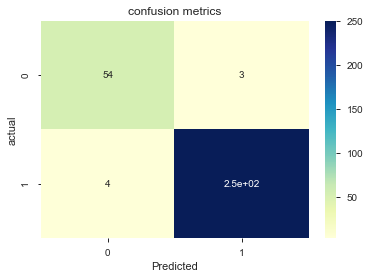

In [148]:
sns.heatmap(confusion_matrix(Y_test,pred_knn),annot=True,cmap='YlGnBu')

plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("confusion metrics")
plt.show()

# data is imbalance 

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf1=RandomForestClassifier(criterion="gini")

In [151]:
pred_rf=rf1.fit(scaled_train11,Y_train).predict(xtest1)

In [152]:
print("accuracy",accuracy_score(Y_test,pred_rf))
print("kappa",cohen_kappa_score(Y_test,pred_rf))
print("mcc",matthews_corrcoef(Y_test,pred_rf))

accuracy 0.954983922829582
kappa 0.8555312230406795
mcc 0.8571757883964063


# According to my understanding the more time a user spends on the app the less chances of him uninstalling .
# session count is low for a number of user 
# share count is low 
# notification received is by many and user have dismissd many notification 
# quiz count as well as video count is as well low not many people have actually used the application 


# data is imbalanced as i worked on very less data the data tends to be  imbalanced 

# 3. Final part: WordPress plugin for this model, so that it can be deployed on any WordPress website. You don’t have to create a plugin, just a process to deploy this model on WordPress from scratch to deployment in a production environment. A flowchart or something similar would be preferable. Along with the technologies used.

To evaluate this, please create a small plugin of your choice that can be integrated with WordPress.

In [153]:
!pip install FLASK